In [1]:
import pandas as pd

## importing csv data

In [32]:
df=pd.read_csv('sales.csv')

In [33]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
0,23429,18/03/2016,Critical,28,165.4300,Regular Air,6.0,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,3/18/2016
1,386,23/01/2018,High,4,16.0072,Regular Air,0.5,Ontario,Corporate,Office Supplies,Labels,Small Box,1/25/2018
2,50754,8/12/2016,Not Specified,9,68.5100,Regular Air,5.4,Northwest Territories,Consumer,Technology,Telephones and Communication,Medium Box,12/9/2016
3,42279,29/06/2016,Not Specified,44,1531.1700,Express Air,7.0,Ontario,Home Office,Technology,Computer Peripherals,Small Box,6/30/2016
4,53635,18/07/2019,Not Specified,33,111.1944,Regular Air,2.1,British Columbia,Small Business,Office Supplies,"Scissors, Rulers and Trimmers",Wrap Bag,7/20/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,20389,10/8/2016,High,24,289.3200,Regular Air,8.5,British Columbia,Corporate,Furniture,Office Furnishings,Small Pack,8/12/2016
8395,16193,9/4/2019,Not Specified,29,1460.3400,Regular Air,5.4,Northwest Territories,Corporate,Technology,Telephones and Communication,Small Pack,4/11/2019
8396,57669,7/8/2017,Critical,41,1929.3400,Regular Air,5.7,British Columbia,Consumer,Office Supplies,Appliances,Small Box,8/8/2017
8397,25313,21/08/2019,Critical,19,448.0100,Regular Air,5.9,Ontario,Corporate,Office Supplies,Pens & Art Supplies,Small Pack,8/23/2019


In [5]:
df.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Ship Mode', 'Shipping Cost', 'Province', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Ship Date'],
      dtype='object')

# TASK #1 DATA CLEANING

### DELETEING UNUSEFUL COLUMNS

In [34]:
df.drop(columns=['Ship Date','Product Sub-Category','Product Container','Shipping Cost', 'Ship Mode'],inplace=True)

checking null values

In [5]:
df.isnull().sum()

Order ID            0
Order Date          0
Order Priority      0
Order Quantity      0
Sales               0
Province            0
Customer Segment    0
Product Category    0
dtype: int64

In [6]:
df.dtypes

Order ID              int64
Order Date           object
Order Priority       object
Order Quantity        int64
Sales               float64
Province             object
Customer Segment     object
Product Category     object
dtype: object

changing date column data type into datetime

In [35]:
import datetime as dt


# converting order date column into datetime datatype

In [36]:
df['Order Date']=pd.to_datetime(df['Order Date'])

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_10276\1722919639.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


2016 dates

In [7]:
desired_year=2016
sales_2016 = df[df['Order Date'].dt.year==desired_year]
sales_2016.to_csv('sales_2016.csv')

### adding month column 

In [11]:
sales_2016['month']=sales_2016['Order Date'].dt.month_name()


C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_13616\182902804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2016['month']=sales_2016['Order Date'].dt.month_name()


## sorting date column into descending order

In [61]:
sales_2016=sales_2016.sort_values(by='Order Date',ascending=True)
sales_2016

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category,month
7983,13729,2016-01-01,Not Specified,9,933.5500,Quebec,Home Office,Office Supplies,January
6840,28774,2016-01-01,High,32,192.9900,Ontario,Small Business,Office Supplies,January
740,30053,2016-01-02,Critical,41,3508.5400,Manitoba,Consumer,Technology,January
7714,32676,2016-01-02,Critical,37,1816.2600,Prince Edward Island,Corporate,Technology,January
8260,4454,2016-01-02,Low,17,59.3300,Prince Edward Island,Corporate,Office Supplies,January
...,...,...,...,...,...,...,...,...,...
7086,39841,2016-12-31,Medium,43,314.7200,British Columbia,Small Business,Office Supplies,December
6213,710,2016-12-31,Low,29,4486.3816,Manitoba,Corporate,Technology,December
3198,59174,2016-12-31,Medium,6,1276.6200,Manitoba,Consumer,Technology,December
8064,710,2016-12-31,Low,42,173.0900,Manitoba,Corporate,Office Supplies,December


# analyzing 2016 sales only

#### calculate some descriptive statistics for quantitative variables like Order Quantity and Sales?

In [62]:
sales_2016[['Order Quantity','Sales']].describe()

,Order Quantity,Sales
count,2158.000000,2158.000000
mean,25.259963,2090.133673
std,14.494050,4458.520170
min,1.000000,3.660000
25%,13.000000,157.496050
50%,25.000000,509.906400
75%,38.000000,1995.777500
max,50.000000,95295.323500


What are the unique values for categorical variables like Order Priority, Customer Segment, and Product Category?

In [38]:
sales_2016['Order Priority'].unique()
sales_2016['Customer Segment'].unique()
sales_2016['Product Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

Can you summarize the data by month using the month column?

In [63]:
month_sales=sales_2016.groupby('month').Sales.sum().reset_index().sort_values(by='Sales',ascending=False)

march is the best month for sales 

EXPLORATORY DATA ANALYSIS

 create some visualizations to understand the distribution of Order Quantity and Sales?

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_21744\1527288154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Sales', data=month_sales, palette=bar_colors)


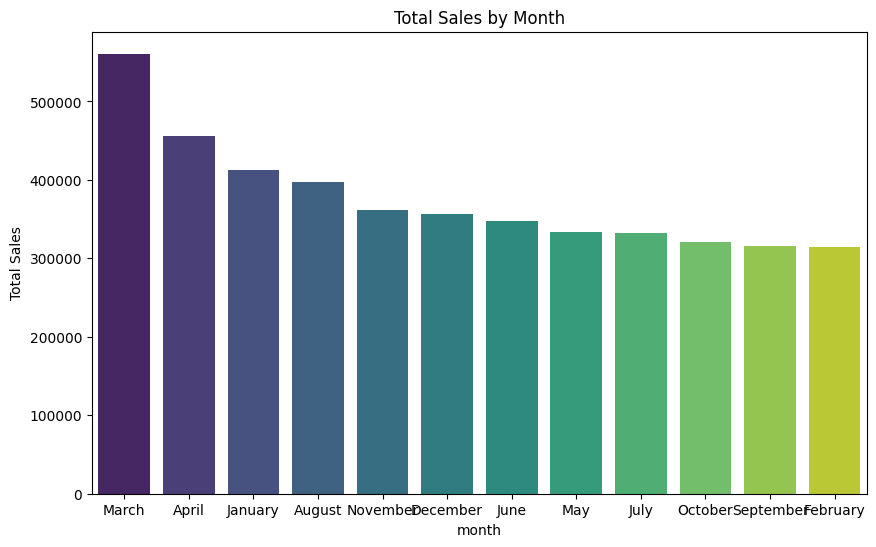

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# Define different bar colors
bar_colors = sns.color_palette("viridis", len(month_sales))

# Plotting the bar chart
plt.figure(figsize=(10, 6))

sns.barplot(x='month', y='Sales', data=month_sales, palette=bar_colors)
plt.title('Total Sales by Month')
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.show()


Are there any relationships between Order Quantity and other variables like Order Priority or Product Category?

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_21744\974329885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Priority', y='Order Quantity', data=sales_2016, palette='viridis')
C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_21744\974329885.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product Category', y='Order Quantity', data=sales_2016, palette='muted')


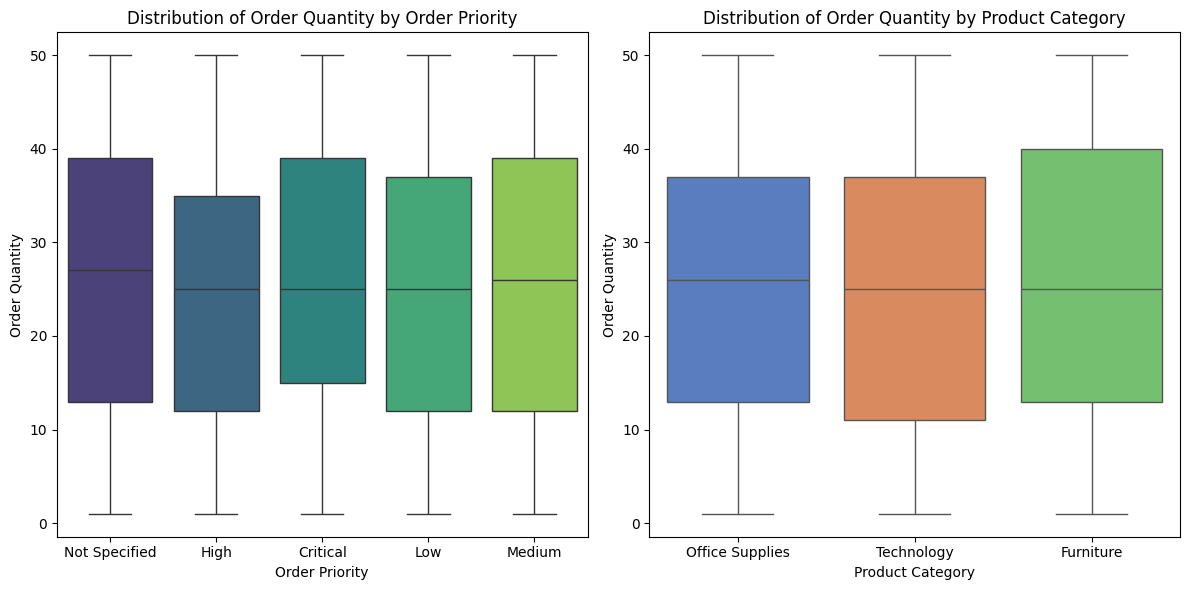

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Order Priority', y='Order Quantity', data=sales_2016, palette='viridis')
plt.title('Distribution of Order Quantity by Order Priority')

plt.subplot(1, 2, 2)
sns.boxplot(x='Product Category', y='Order Quantity', data=sales_2016, palette='muted')
plt.title('Distribution of Order Quantity by Product Category')

plt.tight_layout()
plt.show()


create visualizations to compare sales across different months or customer segments?

In [78]:
sales_customer_segment=sales_2016.groupby('Customer Segment')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
sales_customer_segment
import plotly.express as px
px.bar(sales_customer_segment,x='Customer Segment',y='Sales',color='Customer Segment',width=900)

 segment customers based on their order history or other relevant factors?

In [84]:
sales_customer_segment=sales_2016.groupby('Customer Segment')['Order Quantity'].sum().reset_index().sort_values(by='Order Quantity',ascending=False)
sales_customer_segment

,Customer Segment,Order Quantity
1,Corporate,19804
2,Home Office,12954
0,Consumer,11204
3,Small Business,10549


Are there any specific customer segments with higher sales or order quantities?

In [87]:
sales_customer_segment=sales_2016.groupby('Customer Segment')[['Sales','Order Quantity']].sum().reset_index().sort_values(by='Order Quantity',ascending=False)
sales_customer_segment

,Customer Segment,Sales,Order Quantity
1,Corporate,1.629950e+06,19804
2,Home Office,1.048937e+06,12954
0,Consumer,1.031496e+06,11204
3,Small Business,8.001256e+05,10549


corporate segment has the higher sales and order quantities

## privnce sales

In [95]:
sales_customer_segment=sales_2016.groupby('Province')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
sales_customer_segment

,Province,Sales
8,Ontario,969034.2381
1,British Columbia,603362.6507
0,Alberta,516004.5616
11,Saskachewan,487652.6773
10,Quebec,396245.5925
2,Manitoba,356065.1222
3,New Brunswick,340016.3130
12,Yukon,242308.3758
6,Nova Scotia,231811.8650
5,Northwest Territories,203704.2502


In [99]:
px.area(sales_customer_segment,x='Province',y='Sales',width=800)

2017 dates

# choosing 2017 sales data from whole data

In [8]:
desired_year=2017
sales_2017=df[df['Order Date'].dt.year==desired_year]
sales_2017

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category
5,59270,2017-10-01,High,5,692.58,Quebec,Small Business,Furniture
7,43781,2017-01-02,Not Specified,45,531.94,Northwest Territories,Small Business,Office Supplies
9,48839,2017-09-07,Critical,1,103.93,Northwest Territories,Corporate,Office Supplies
12,18822,2017-12-20,Low,34,2086.54,Saskachewan,Small Business,Technology
13,47078,2017-04-18,Medium,18,90.67,New Brunswick,Consumer,Office Supplies
...,...,...,...,...,...,...,...,...
8380,33505,2017-09-24,Low,35,2635.67,Ontario,Consumer,Technology
8381,4004,2017-05-05,Medium,44,1618.11,Quebec,Corporate,Office Supplies
8382,7553,2017-06-05,Medium,12,1154.73,Alberta,Home Office,Furniture
8391,47750,2017-06-14,Low,1,208.69,Nova Scotia,Corporate,Office Supplies


# task #1 Data Cleaning

## sorting order date column from januray to december

In [9]:
sales_2017=sales_2017.sort_values(by='Order Date',ascending=True)
sales_2017

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category
1114,38215,2017-01-01,Critical,38,3934.35,Saskachewan,Small Business,Office Supplies
6144,48480,2017-01-01,Critical,32,11881.01,Manitoba,Corporate,Office Supplies
6948,38215,2017-01-01,Critical,42,809.70,Saskachewan,Small Business,Technology
7266,25860,2017-01-01,Low,9,792.01,Nova Scotia,Consumer,Office Supplies
4191,25860,2017-01-01,Low,23,1378.99,Nova Scotia,Consumer,Technology
...,...,...,...,...,...,...,...,...
4141,2277,2017-12-31,Not Specified,21,904.49,Nunavut,Home Office,Office Supplies
6152,52640,2017-12-31,Medium,18,1245.21,Manitoba,Consumer,Office Supplies
8177,17058,2017-12-31,High,15,77.76,Manitoba,Home Office,Office Supplies
7788,2277,2017-12-31,Not Specified,10,71.20,Nunavut,Home Office,Technology


### adding month column

In [10]:
sales_2017['month']=sales_2017['Order Date'].dt.month_name()

# Task #2 data analysis

what is the best month for sales

In [11]:
month_sales=sales_2017.groupby('month')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
month_sales

,month,Sales
11,September,439632.3521
9,November,389459.4299
10,October,379798.2815
3,February,320483.4435
1,August,320154.7421
8,May,297785.1820
6,June,295390.1703
2,December,293581.0923
5,July,290956.1983
0,April,290592.3472


how many quantities every month sold

In [12]:
monthly_quantity = sales_2017.groupby('month').agg({'Order Quantity': 'sum'}).sort_values(by='Order Quantity',ascending=False)
monthly_quantity

,Order Quantity
month,
September,5037
August,5020
May,4994
June,4858
July,4793
October,4558
November,4526
December,4292
February,4265


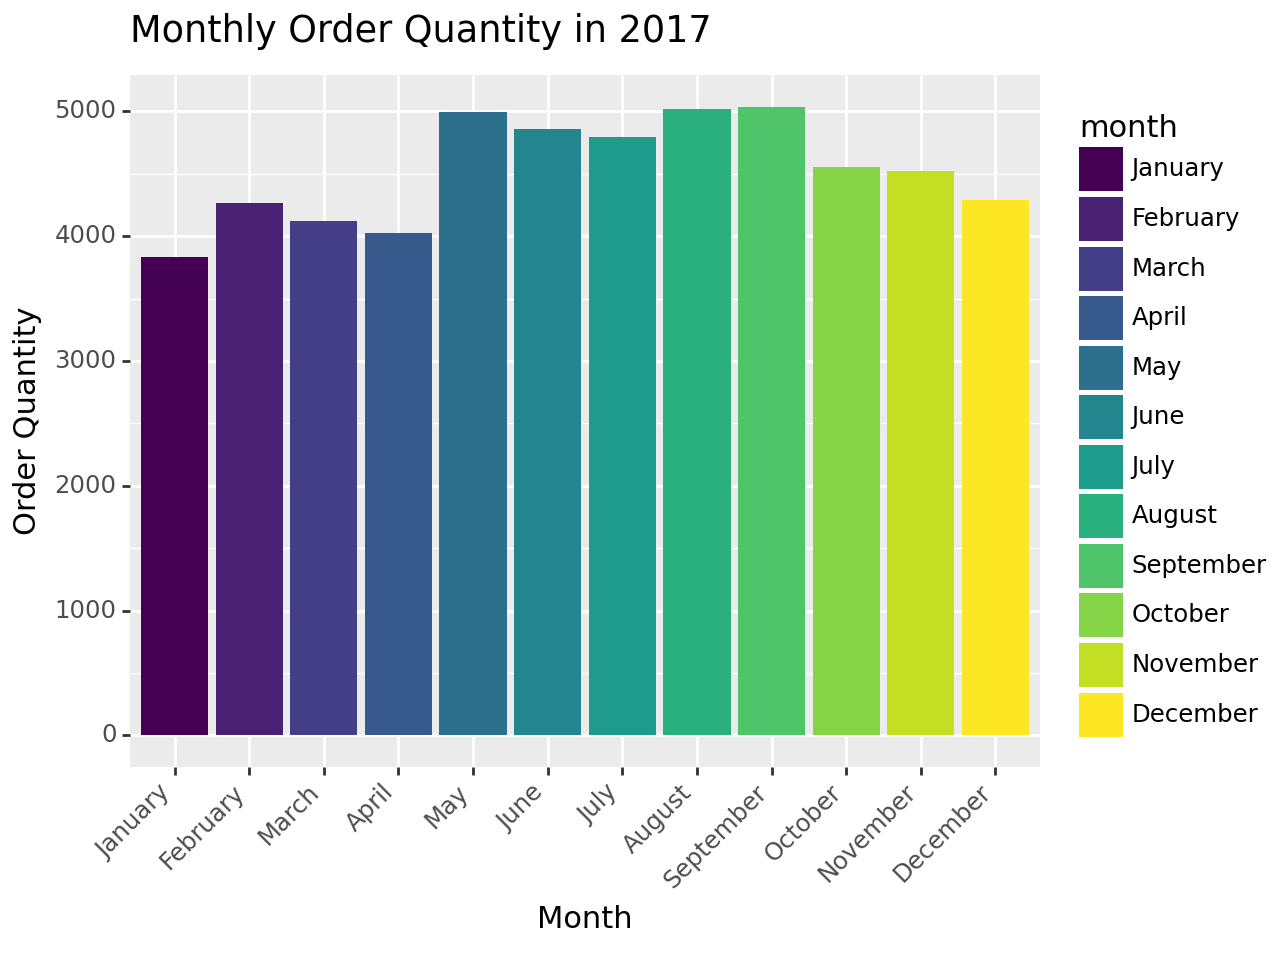

In [13]:
from plotnine import ggplot, aes, geom_bar, theme, labs
from plotnine.themes import element_text


# Make sure 'month' is a categorical variable
monthly_quantity['month'] = pd.Categorical(monthly_quantity.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Create ggplot
p = ggplot(monthly_quantity, aes(x='month', y='Order Quantity', fill='month')) + \
    geom_bar(stat='identity') + \
    theme(axis_text_x=element_text(angle=45, hjust=1)) + \
    labs(title='Monthly Order Quantity in 2017', x='Month', y='Order Quantity')

# Show the plot
print(p)


##  province distribution through sales

In [14]:
province_sales = sales_2017.groupby('Province').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
province_sales

,Sales
Province,
Ontario,826701.7611
British Columbia,530008.2973
Quebec,395620.6791
Alberta,381092.6914
Manitoba,306520.2944
Yukon,289140.2516
Saskachewan,271615.9810
Nova Scotia,231110.0142
Northwest Territories,214190.4443


Overall Sales:
The total sales across all provinces is $3,793,795.15.
The average sales per province is $291,830.40.
Top 3 Provinces by Sales:
Ontario has the highest sales with $826,701.76, followed by British Columbia with $530,008.29 and Quebec with $395,620.68.
Sales Distribution:
The sales are distributed somewhat evenly across the provinces, with a standard deviation of $214,574.83.
The top 25% of provinces have sales of at least $166,244.55, while the bottom 25% of provinces have sales of less than $32,525.95.

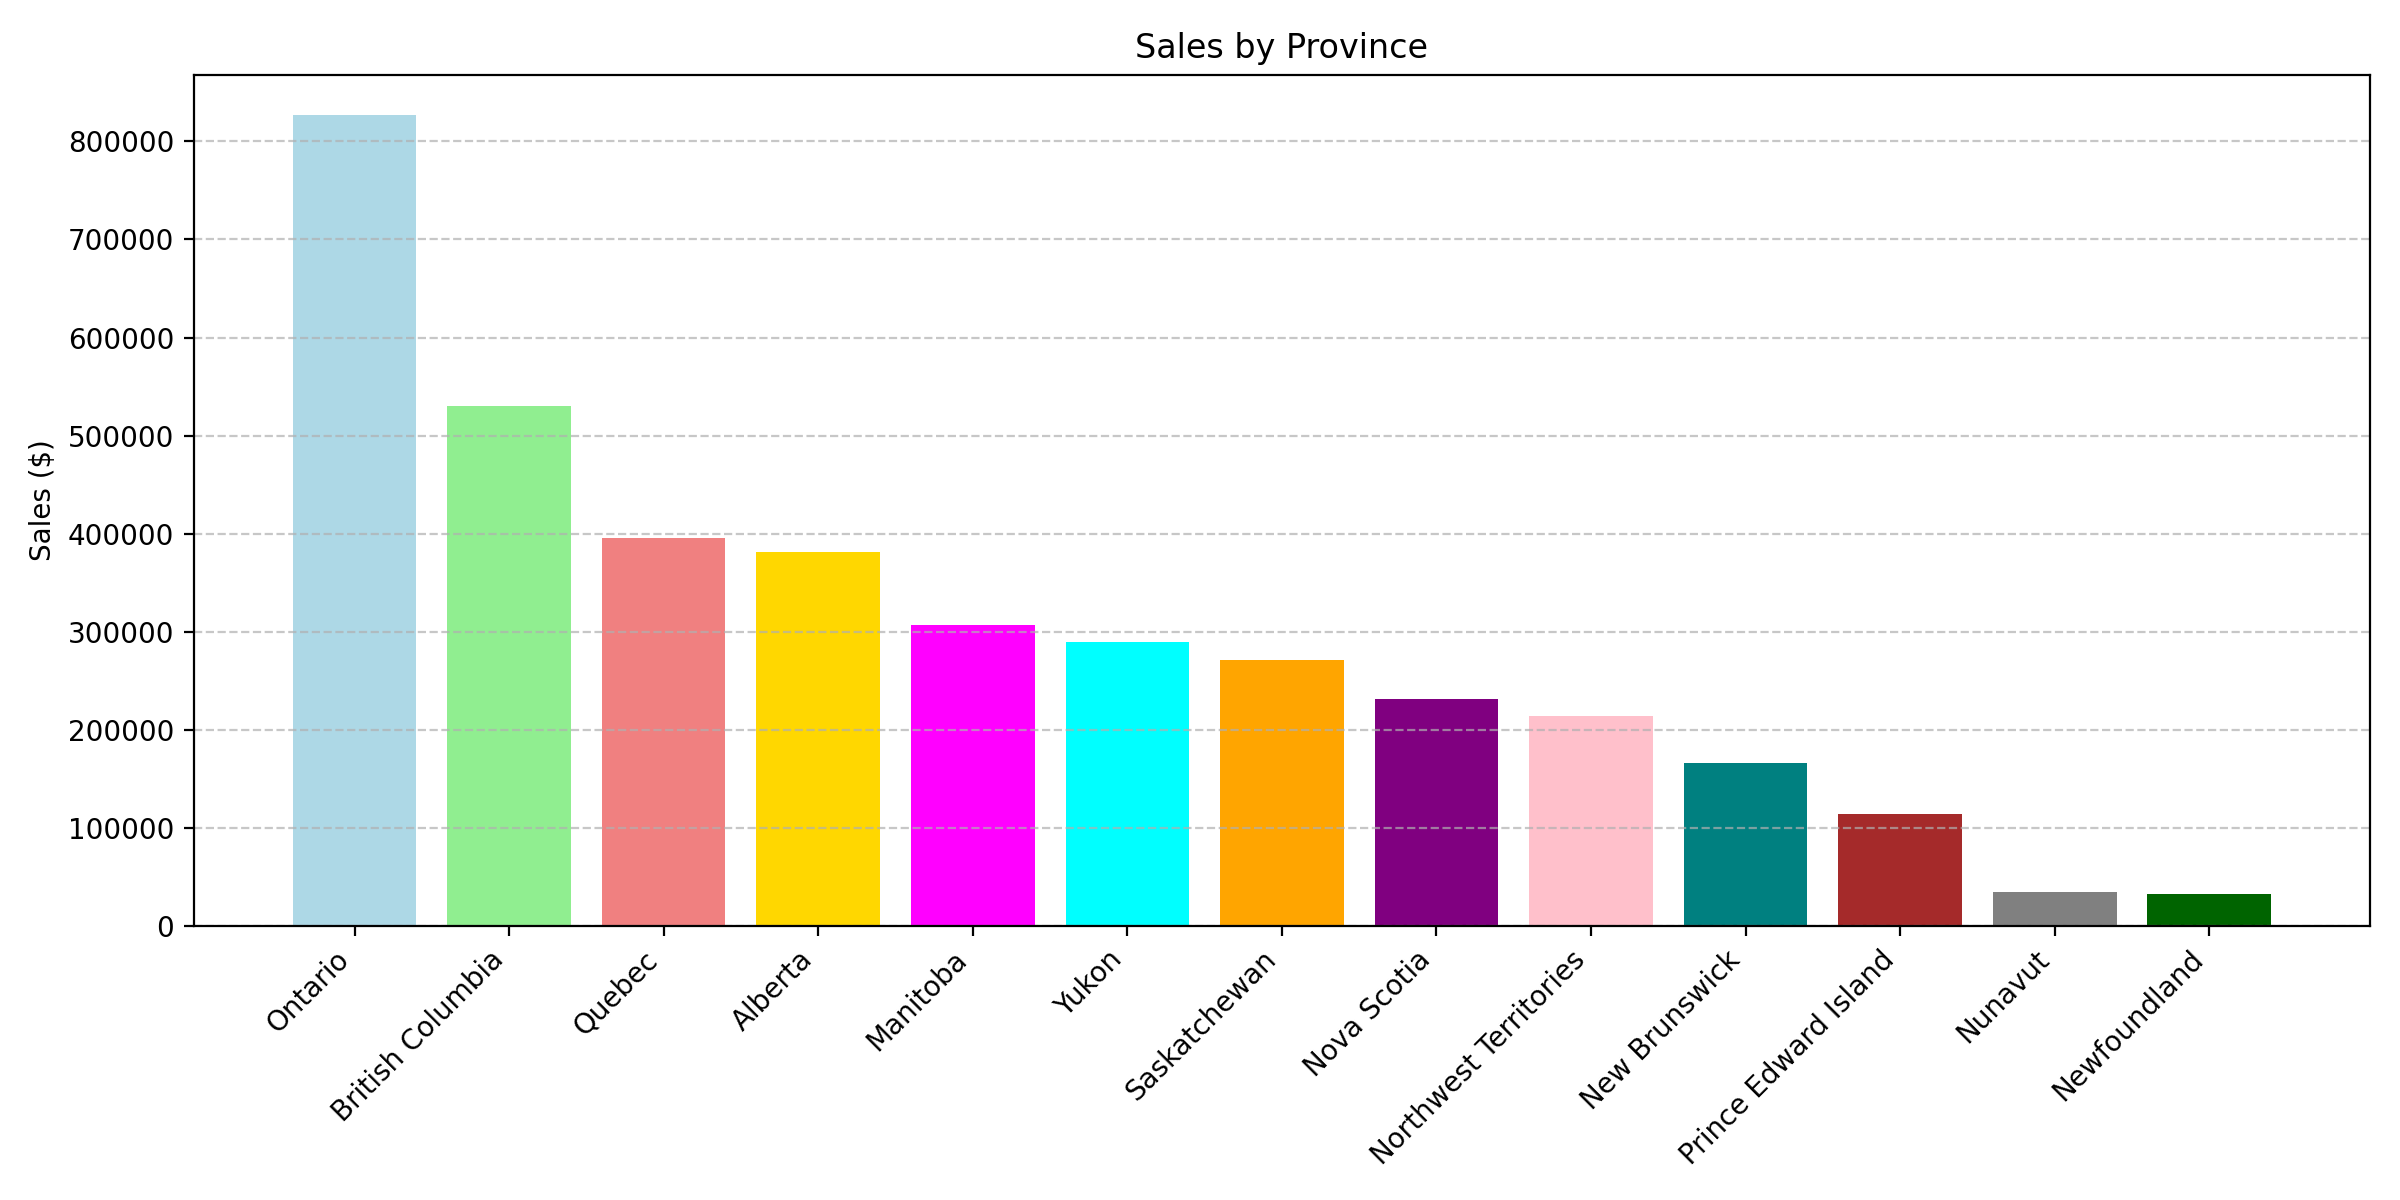

In [25]:
import matplotlib.pyplot as plt

# Define province names and sales values
provinces = ["Ontario", "British Columbia", "Quebec", "Alberta", "Manitoba", "Yukon", "Saskatchewan", "Nova Scotia",
            "Northwest Territories", "New Brunswick", "Prince Edward Island", "Nunavut", "Newfoundland"]
sales = [826701.7611, 530008.2973, 395620.6791, 381092.6914, 306520.2944, 289140.2516, 271615.9810, 231110.0142,
          214190.4443, 166244.5543, 114137.5771, 34886.6529, 32525.9507]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(provinces, sales, color=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'magenta', 'cyan', 'orange', 'purple', 'pink', 'teal', 'brown', 'grey', 'darkgreen'])
plt.xticks(rotation=45, ha="right")  # Rotate province labels for better readability
plt.ylabel("Sales ($)")
plt.title("Sales by Province")

# Customize the chart (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the bar chart
plt.show()


In [15]:
sales_2017

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category,month
1114,38215,2017-01-01,Critical,38,3934.35,Saskachewan,Small Business,Office Supplies,January
6144,48480,2017-01-01,Critical,32,11881.01,Manitoba,Corporate,Office Supplies,January
6948,38215,2017-01-01,Critical,42,809.70,Saskachewan,Small Business,Technology,January
7266,25860,2017-01-01,Low,9,792.01,Nova Scotia,Consumer,Office Supplies,January
4191,25860,2017-01-01,Low,23,1378.99,Nova Scotia,Consumer,Technology,January
...,...,...,...,...,...,...,...,...,...
4141,2277,2017-12-31,Not Specified,21,904.49,Nunavut,Home Office,Office Supplies,December
6152,52640,2017-12-31,Medium,18,1245.21,Manitoba,Consumer,Office Supplies,December
8177,17058,2017-12-31,High,15,77.76,Manitoba,Home Office,Office Supplies,December
7788,2277,2017-12-31,Not Specified,10,71.20,Nunavut,Home Office,Technology,December


### what is the customer segment distribution accors sales 

In [17]:
customer_sales = sales_2017.groupby('Customer Segment').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
customer_sales

,Sales
Customer Segment,
Corporate,1.323152e+06
Home Office,1.084274e+06
Consumer,7.362810e+05
Small Business,6.500885e+05


Corporate accounts were the driving force, generating almost 35% of total sales. The 'Home Office' segment held its own, accounting for nearly 29%. While consumer and small business sales were significant, they contributed less than 20% each."

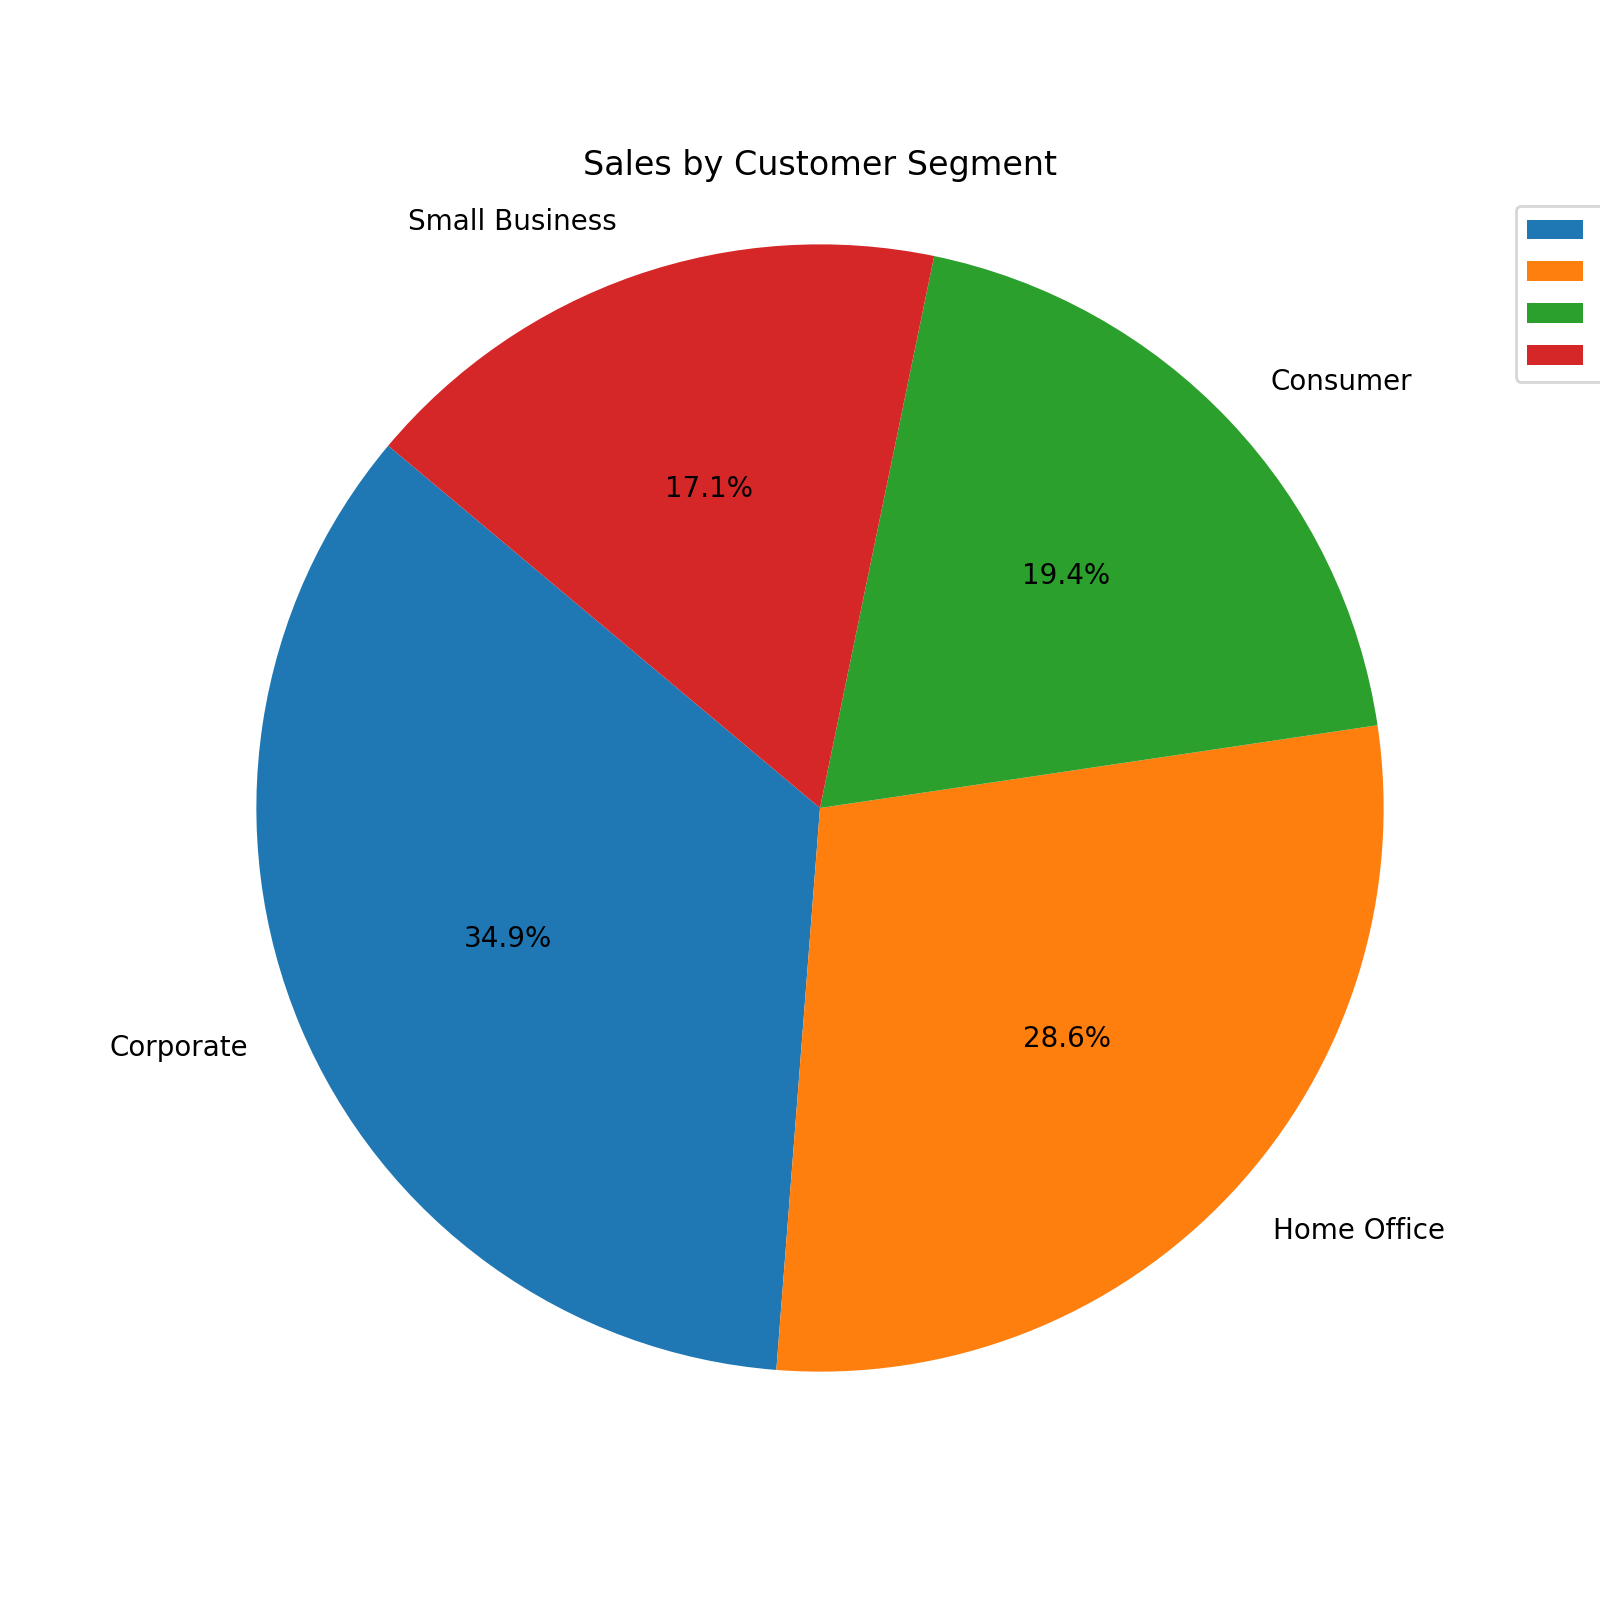

In [24]:
import matplotlib.pyplot as plt

# Define customer segments and sales values
segments = ["Corporate", "Home Office", "Consumer", "Small Business"]
sales = [1.323152e+06, 1.084274e+06, 7.362810e+05, 6.500885e+05]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=segments, autopct="%1.1f%%", startangle=140)  # Adjust start angle for better segment visibility
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

# Customize the pie chart
plt.title("Sales by Customer Segment")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the pie chart
plt.show()


product category accors sales

In [20]:
product_sales = sales_2017.groupby('Product Category').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
product_sales

,Sales
Product Category,
Technology,1.489250e+06
Furniture,1.339873e+06
Office Supplies,9.646716e+05


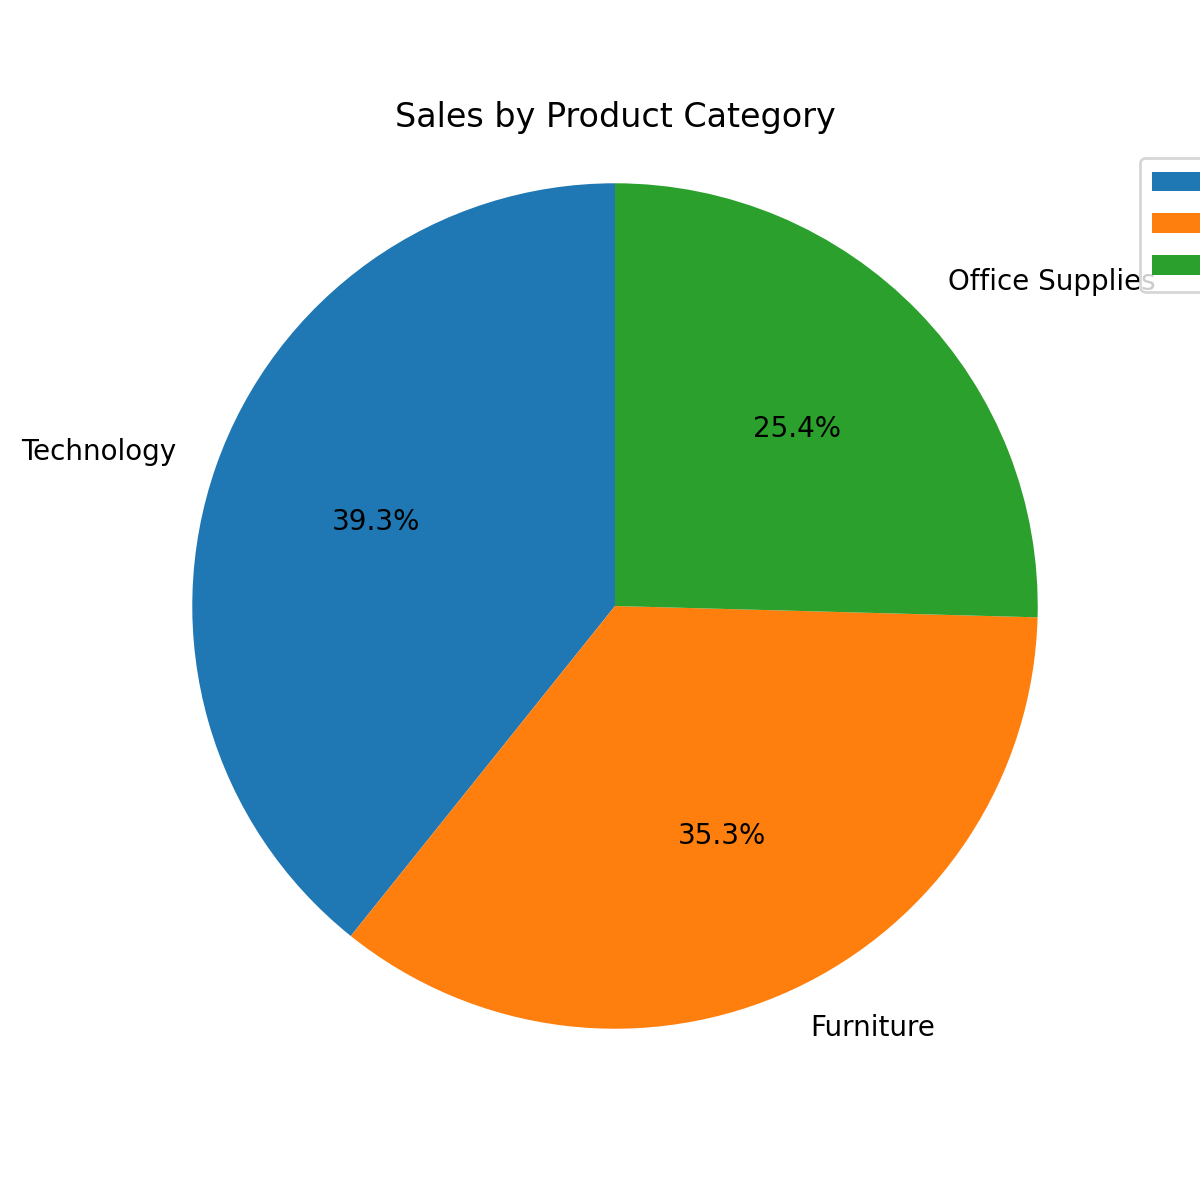

In [23]:
import matplotlib.pyplot as plt

# Define product categories and sales values
categories = ["Technology", "Furniture", "Office Supplies"]
sales = [1.489250e+06, 1.339873e+06, 9.646716e+05]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sales, labels=categories, autopct="%1.1f%%", startangle=90)
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

# Customize the pie chart
plt.title("Sales by Product Category")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the pie chart
plt.show()


# 2018 dates

In [38]:
desired_year=2018
sales_2018=df[df['Order Date'].dt.year==desired_year]
sales_2018


,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category
1,386,2018-01-23,High,4,16.0072,Ontario,Corporate,Office Supplies
6,26370,2018-07-08,Not Specified,20,706.4900,Northwest Territories,Home Office,Office Supplies
10,4672,2018-05-11,Critical,20,163.1100,Alberta,Corporate,Furniture
16,6791,2018-01-31,Medium,14,781.4500,Alberta,Small Business,Technology
19,59973,2018-11-14,Low,29,11812.5300,Saskachewan,Small Business,Technology
...,...,...,...,...,...,...,...,...
8354,38531,2018-04-12,Low,26,126.7200,New Brunswick,Home Office,Office Supplies
8367,40034,2018-09-03,Medium,47,645.9500,Alberta,Consumer,Office Supplies
8374,46885,2018-06-06,Low,32,2136.9300,Manitoba,Corporate,Furniture
8384,40422,2018-07-17,Critical,39,2345.9100,Ontario,Consumer,Technology


# task #1 Data Cleaning
## adding month column

In [39]:
sales_2018['month']=sales_2018['Order Date'].dt.month_name()

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_10276\2348253253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# DATA ANALYSIS

what is the sales distribution accros mnths?

In [40]:
sales_monts = sales_2017.groupby('month').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
sales_monts

,Sales
month,
September,439632.3521
November,389459.4299
October,379798.2815
February,320483.4435
August,320154.7421
May,297785.1820
June,295390.1703
December,293581.0923
July,290956.1983


1. Peak Season in September:

Headline: September Soars! Top Sales Month with $439,632.35 in Revenue.
Key takeaway: September clearly dominates, with nearly 10% more sales than any other month. This could indicate seasonal factors, product launches, or marketing campaigns that resonated well.
2. Steady Performance:

Headline: Consistent Sales Throughout the Year, with October, November, and August close behind September.
Key takeaway: While September shines, the remaining months show consistent performance, suggesting a stable customer base and dependable revenue flow.
3. Winter Slump:

Headline: December and January See a Dip, Highlighting Potential for Seasonal Fluctuations.
Key takeaway: December and January have the lowest sales, indicating a potential winter slump. This could inform future marketing strategies to boost sales during these months.
4. Growth Potential:

Headline: Untapped Potential in February and March? Identify Strategies to Improve Performance.
Key takeaway: February and March show lower sales compared to other months. Analyzing reasons behind this dip and implementing targeted campaigns could unlock growth potential.

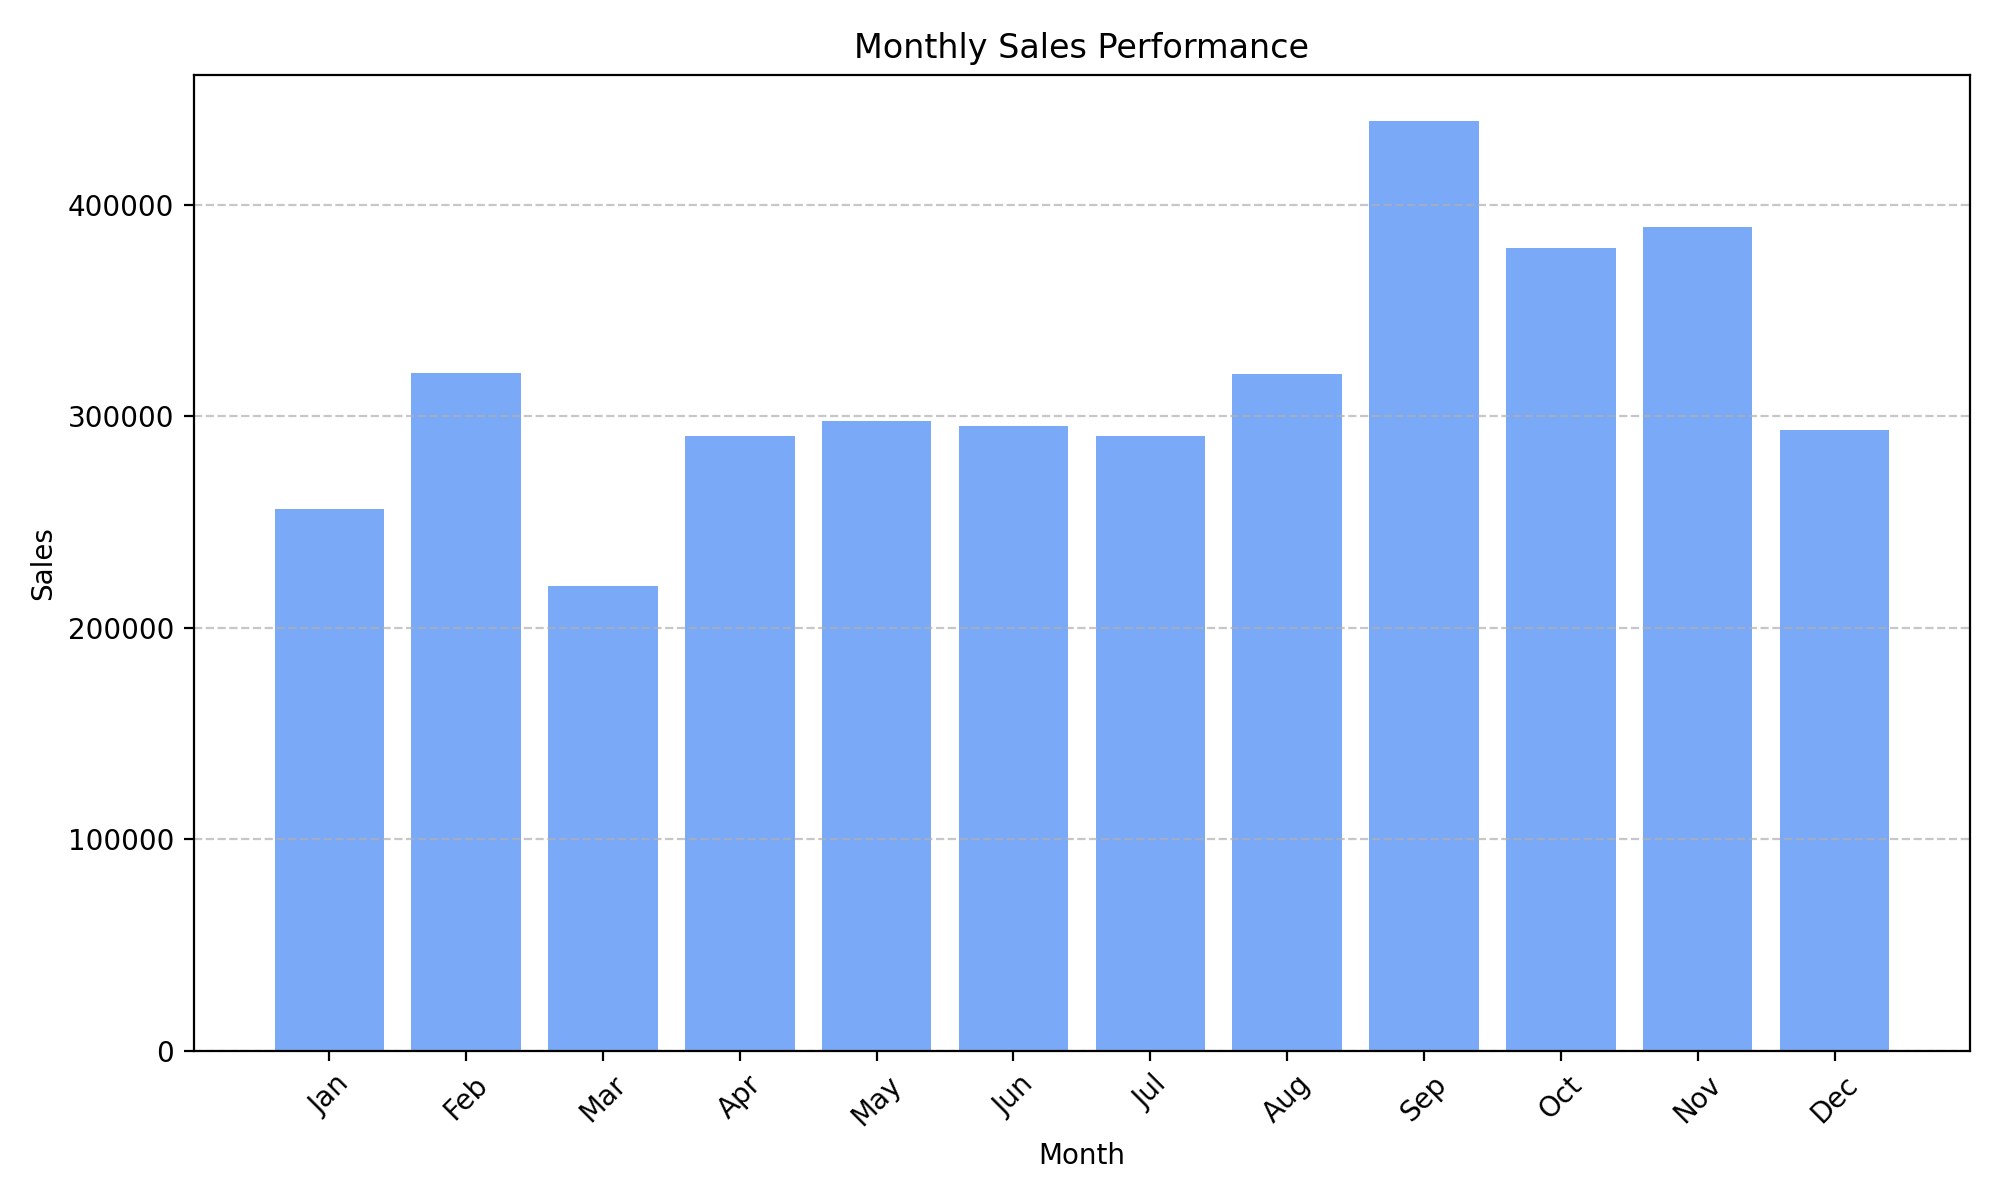

In [42]:
import matplotlib.pyplot as plt

# Define data
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales = [256023.9149, 320483.4435, 219937.9953, 290592.3472, 297785.1820, 295390.1703, 290956.1983, 320154.7421, 439632.3521, 379798.2815, 389459.4299, 293581.0923]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, sales, color="#4285F4", alpha=0.7)

# Customize the chart
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Performance")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()




months and quantity

In [45]:
sales_monts = sales_2017.groupby('month').agg({'Order Quantity': 'sum'}).sort_values(by='Order Quantity',ascending=False)
sales_monts

,Order Quantity
month,
September,5037
August,5020
May,4994
June,4858
July,4793
October,4558
November,4526
December,4292
February,4265


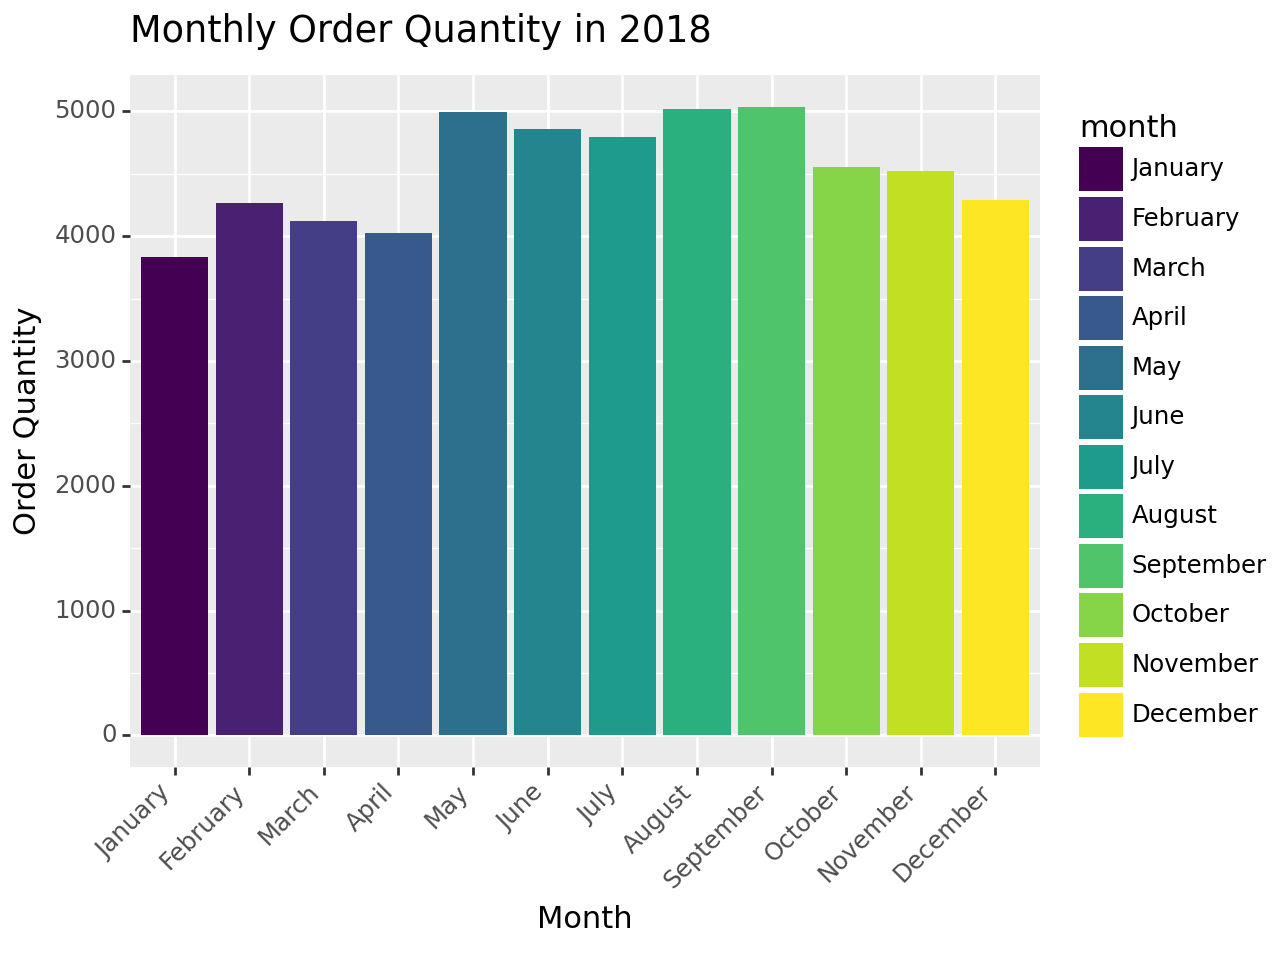

In [47]:
from plotnine import ggplot, aes, geom_bar, theme, labs
from plotnine.themes import element_text


# Make sure 'month' is a categorical variable
monthly_quantity['month'] = pd.Categorical(monthly_quantity.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Create ggplot
p = ggplot(monthly_quantity, aes(x='month', y='Order Quantity', fill='month')) + \
    geom_bar(stat='identity') + \
    theme(axis_text_x=element_text(angle=45, hjust=1)) + \
    labs(title='Monthly Order Quantity in 2018', x='Month', y='Order Quantity')

# Show the plot
print(p)

# whole data analysis

In [48]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Province,Customer Segment,Product Category
0,23429,2016-03-18,Critical,28,165.4300,Ontario,Corporate,Office Supplies
1,386,2018-01-23,High,4,16.0072,Ontario,Corporate,Office Supplies
2,50754,2016-08-12,Not Specified,9,68.5100,Northwest Territories,Consumer,Technology
3,42279,2016-06-29,Not Specified,44,1531.1700,Ontario,Home Office,Technology
4,53635,2019-07-18,Not Specified,33,111.1944,British Columbia,Small Business,Office Supplies
...,...,...,...,...,...,...,...,...
8394,20389,2016-10-08,High,24,289.3200,British Columbia,Corporate,Furniture
8395,16193,2019-09-04,Not Specified,29,1460.3400,Northwest Territories,Corporate,Technology
8396,57669,2017-07-08,Critical,41,1929.3400,British Columbia,Consumer,Office Supplies
8397,25313,2019-08-21,Critical,19,448.0100,Ontario,Corporate,Office Supplies


adding year column 

In [49]:
df['year']=df['Order Date'].dt.year

yearly sales

In [51]:
sales_years = df.groupby('year').agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)
sales_years

,Sales
year,
2016,4.510508e+06
2019,3.977641e+06
2017,3.793795e+06
2018,3.677748e+06


1. Steady Growth:

Headline: Sales Climb Steadily! Annual Sales Increase from $3.68 Million in 2016 to $3.98 Million in 2019.
Key takeaway: Your sales show a positive trend over the years, indicating consistent growth and market traction. This could be attributed to successful marketing, product development, or a loyal customer base.

quantity accros years

In [52]:
quantity_years=df.groupby('year')['Order Quantity'].sum().reset_index().sort_values(by='Order Quantity',ascending=False)
quantity_years

,year,Order Quantity
0,2016,54511
3,2019,54354
1,2017,54328
2,2018,51584


Headline: Monthly Variation: While Overall Levels Steady, Order Quantity Shows Seasonal Peaks and Dips.
Key takeaway: Despite the consistent annual levels, there seems to be a pattern of higher order volumes in certain months (e.g., September) and lower volumes in others (e.g., February). Analyzing the reasons behind these trends (e.g., seasonal promotions, product launches, holidays) can be valuable for future planning.

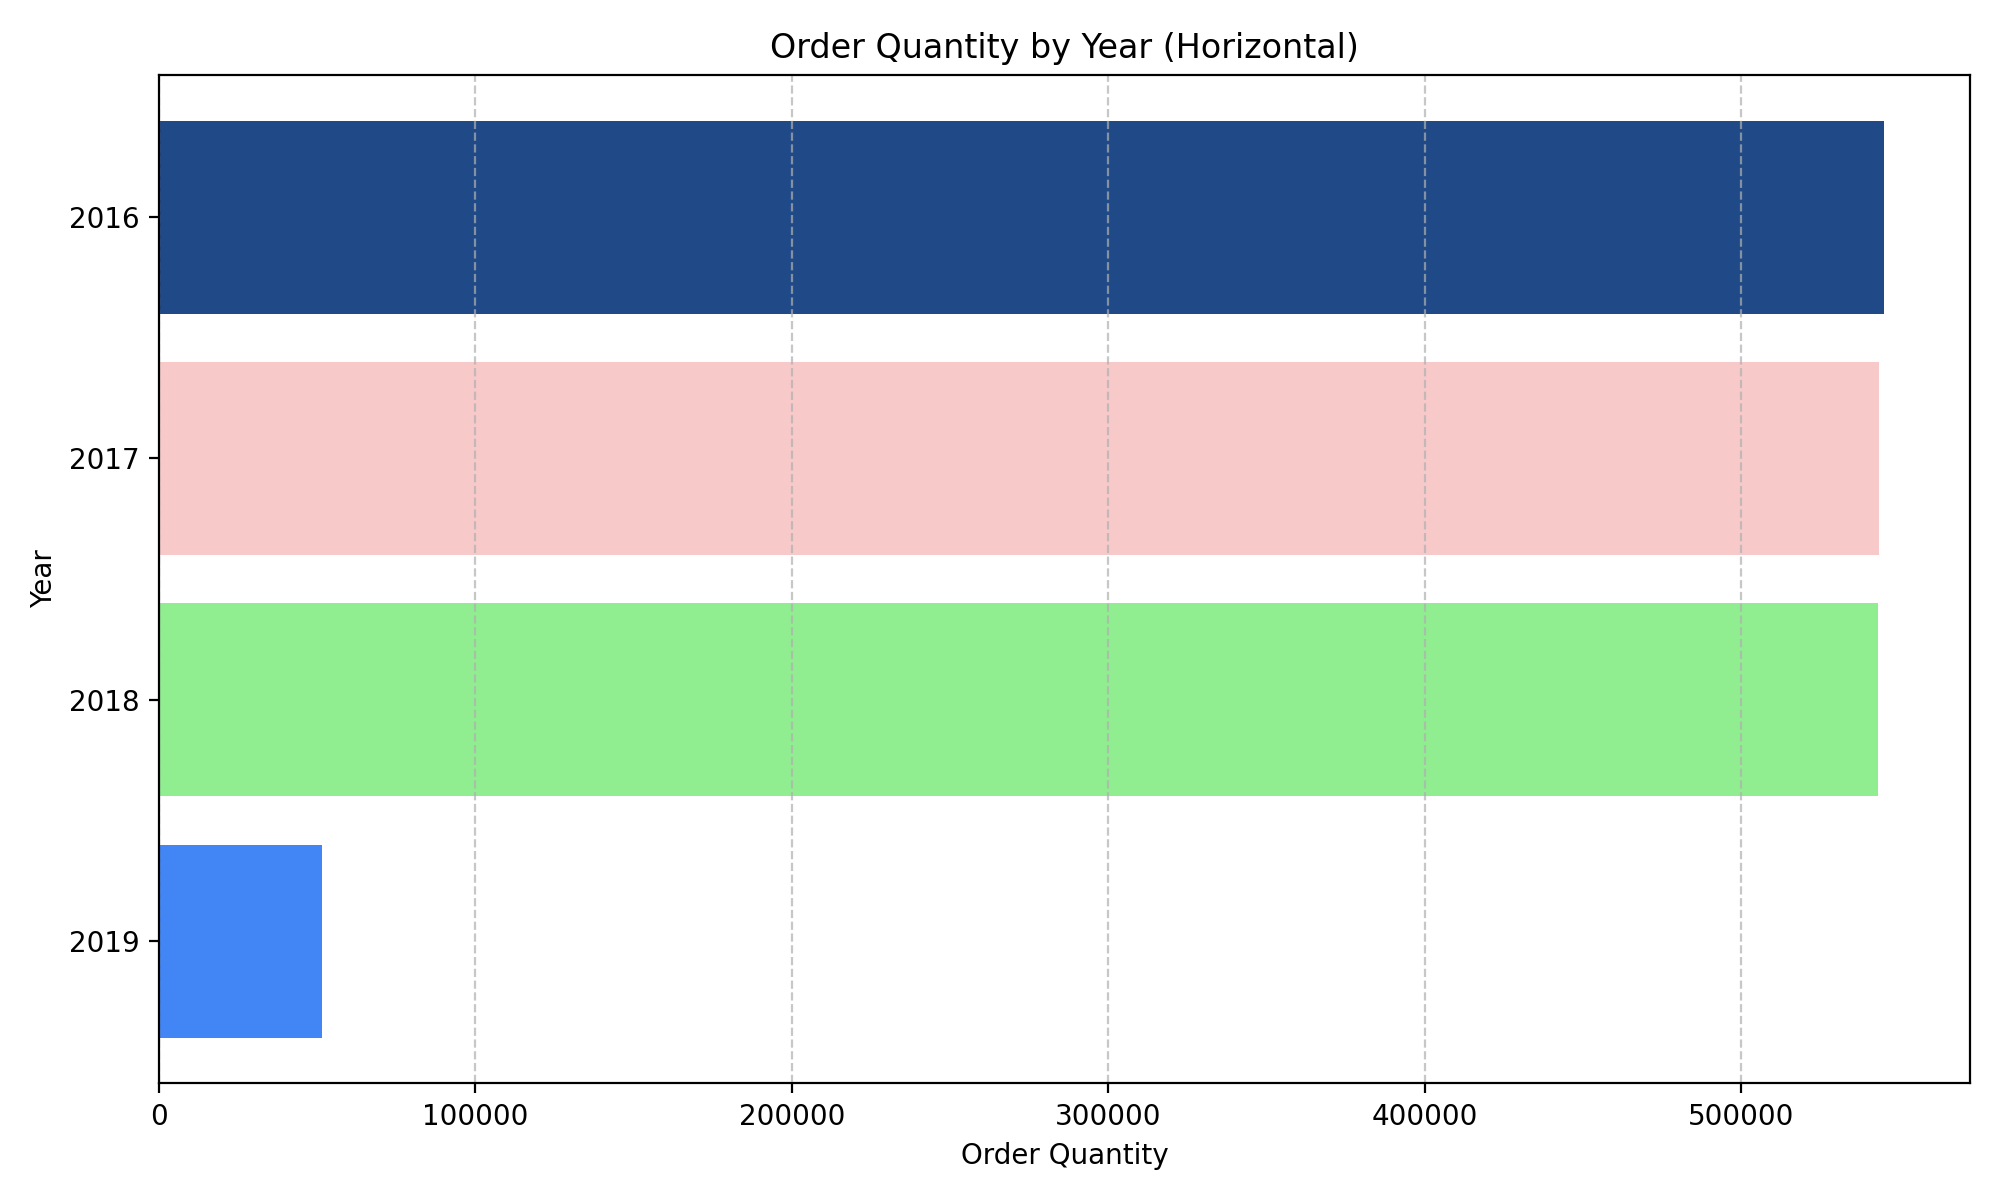

In [56]:
import matplotlib.pyplot as plt

# Define years and order quantities
years = ["2016", "2017", "2018", "2019"]
order_quantities = [545113, 543541, 543282, 51584]

# Define custom colors for each year
colors = ["#204A87", "#F7CAC9", "#90EE90", "#4285F4"]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(years, order_quantities, color=colors)

# Customize the chart
plt.xlabel("Order Quantity")
plt.ylabel("Year")
plt.title("Order Quantity by Year (Horizontal)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display years from highest to lowest

# Display the chart
plt.tight_layout()
plt.show()
